/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Career Choice: Career Choice_Arts
Decision Tree:
{'Accuracy': 0.772, 'Precision': 0.7820892113704793, 'Recall': 0.772, 'F1-score': 0.776954341734093}
Random Forest:
{'Accuracy': 0.875, 'Precision': 0.765625, 'Recall': 0.875, 'F1-score': 0.8166666666666667}
--------------------------------------------------
Career Choice: Career Choice_Computer Science
Decision Tree:
{'Accuracy': 0.75825, 'Precision': 0.7705905452930071, 'Recall': 0.75825, 'F1-score': 0.7642839591649271}
Random Forest:
{'Accuracy': 0.86775, 'Precision': 0.7533953488372094, 'Recall': 0.86775, 'F1-score': 0.8065394190871368}
--------------------------------------------------
Career Choice: Career Choice_Education
Decision Tree:
{'Accuracy': 0.75725, 'Precision': 0.7648463159045927, 'Recall': 0.75725, 'F1-score': 0.7609985614262635}
Random Forest:
{'Accuracy': 0.86575, 'Precision': 0.7499269817454364, 'Recall': 0.86575, 'F1-score': 0.8036869891464559}
--------------------------------------------------
Career Choice: Career

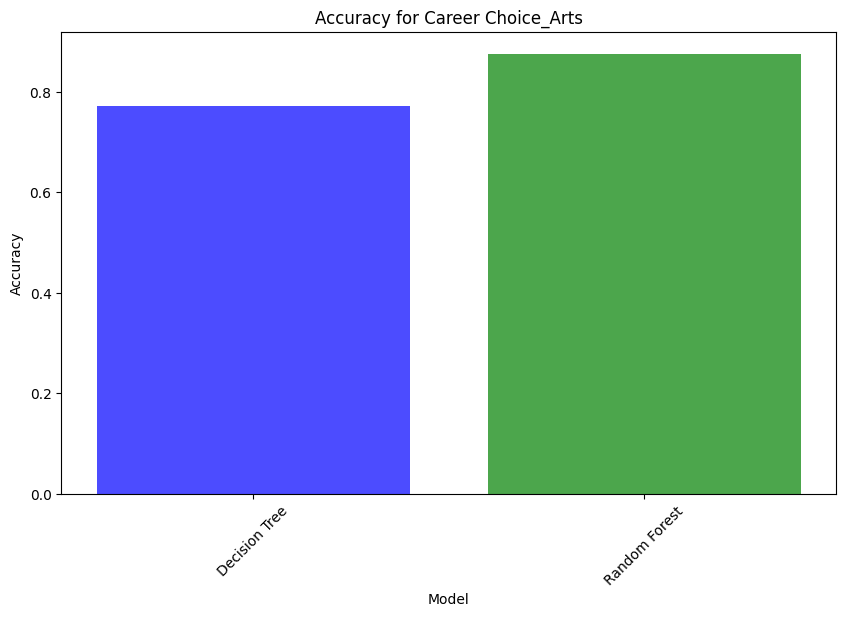

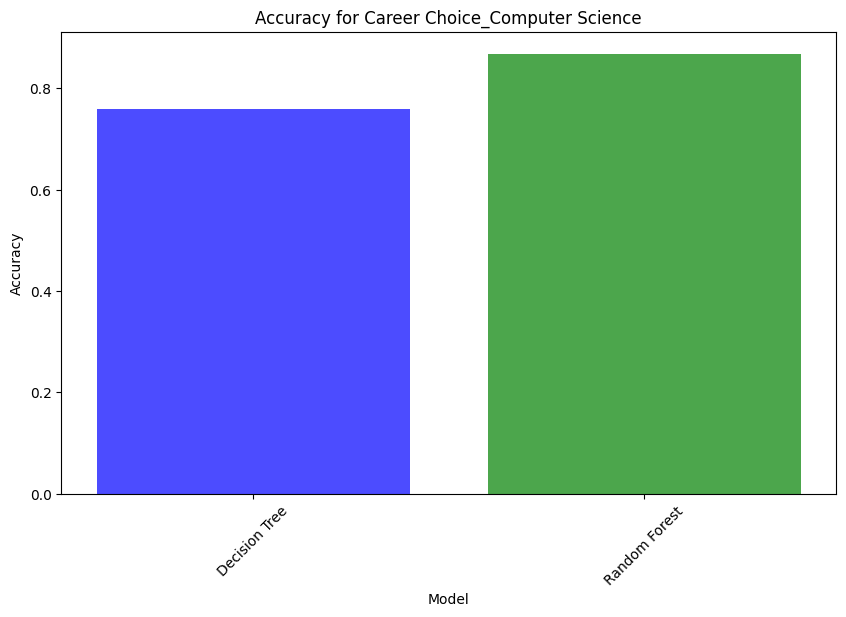

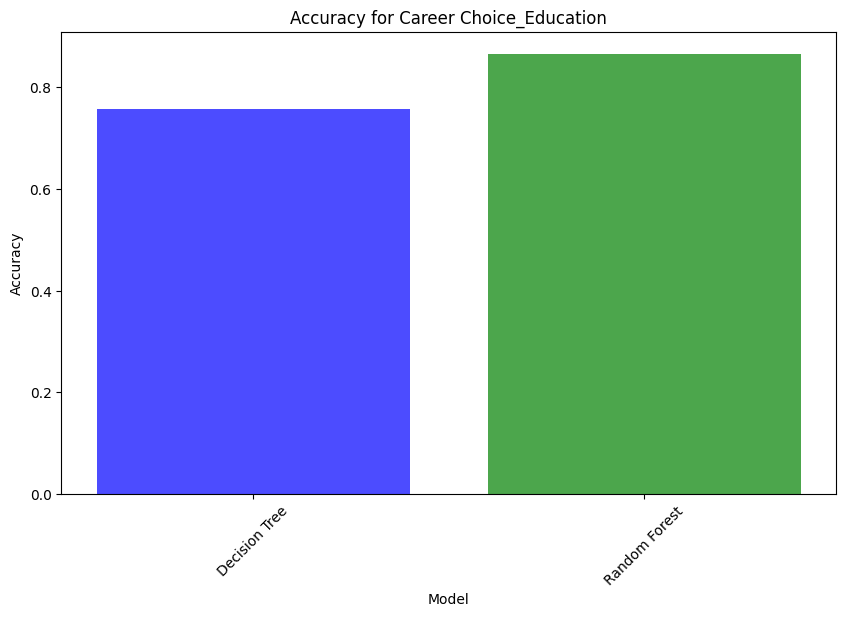

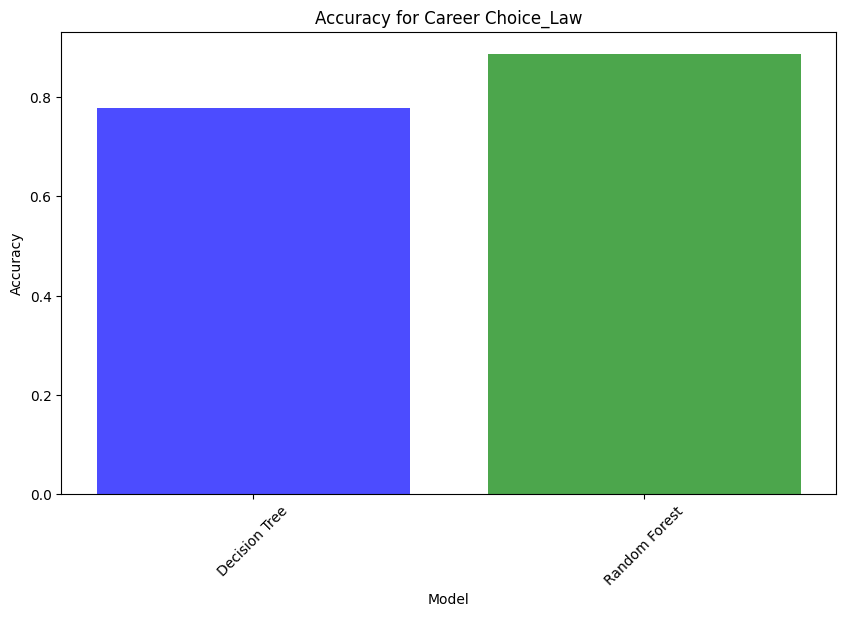

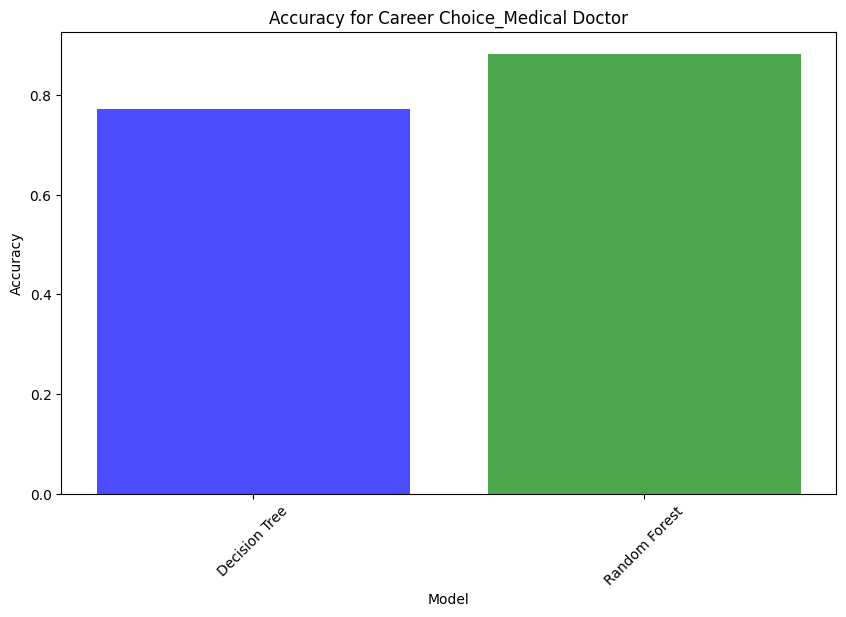

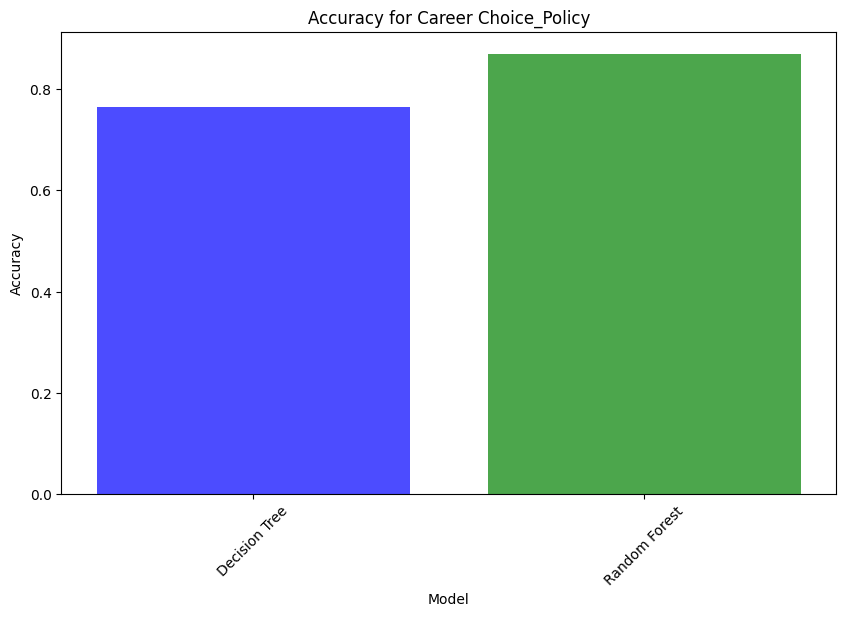

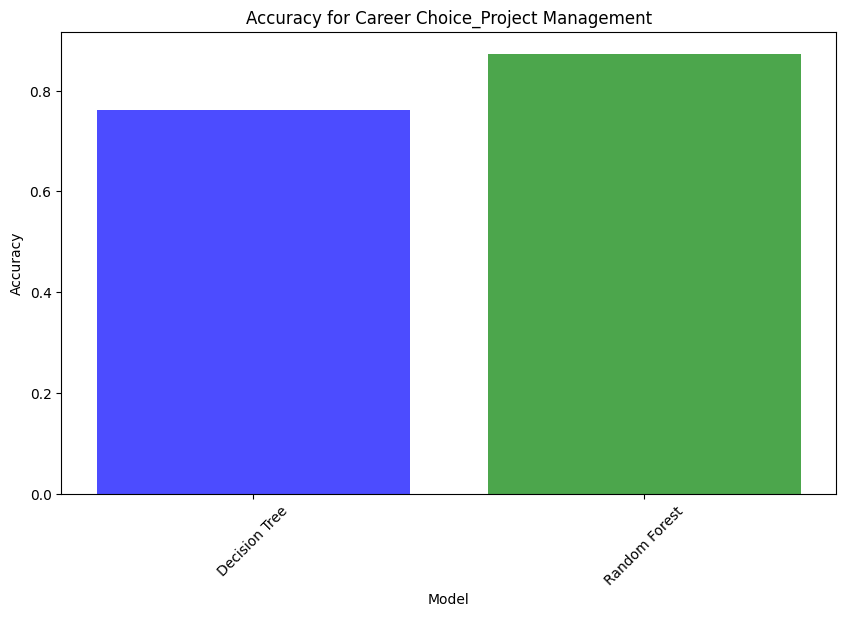

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_score


# Step 1: Data Preparation
# Load data into a pandas DataFrame
data = pd.read_csv('/dataset.csv')

# Convert categorical features into numerical representations using one-hot encoding
categorical_features = ['Gender', 'Current Course', 'Career Choice', 'Soft Skills', 'Languages Spoken']
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Get the list of Career Choice columns
career_choice_columns = [col for col in data_encoded.columns if col.startswith('Career Choice')]

# Step 2: Data Split
X = data_encoded.drop(columns=career_choice_columns)
model_scores = {}  # To store the evaluation scores for each model

# Lists to store the metrics for each career choice
accuracy_dt_list, precision_dt_list, recall_dt_list, f1_dt_list = [], [], [], []
accuracy_rf_list, precision_rf_list, recall_rf_list, f1_rf_list = [], [], [], []


for career_choice_col in career_choice_columns:
    y = data_encoded[career_choice_col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Step 3: Machine Learning Models
    # Train Decision Tree classifier
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)

    # Train Random Forest classifier
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # Step 4: Model Evaluation
    def evaluate_model(model, X_test, y_test):
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        return accuracy, precision, recall, f1

    # Step 4: Model Evaluation
    dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate_model(dt_model, X_test, y_test)
    rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate_model(rf_model, X_test, y_test)

    model_scores[career_choice_col] = {
        'Decision Tree': {'Accuracy': dt_accuracy, 'Precision': dt_precision, 'Recall': dt_recall, 'F1-score': dt_f1},
        'Random Forest': {'Accuracy': rf_accuracy, 'Precision': rf_precision, 'Recall': rf_recall, 'F1-score': rf_f1}
    }

    accuracy_dt_list.append(dt_accuracy)
    precision_dt_list.append(dt_precision)
    recall_dt_list.append(dt_recall)
    f1_dt_list.append(dt_f1)

    accuracy_rf_list.append(rf_accuracy)
    precision_rf_list.append(rf_precision)
    recall_rf_list.append(rf_recall)
    f1_rf_list.append(rf_f1)

# Step 5: Choose the Best Model
# Compare the performance metrics and choose the model with the best metrics for each career choice
for career_choice_col in career_choice_columns:
    print(f"Career Choice: {career_choice_col}")
    print("Decision Tree:")
    print(model_scores[career_choice_col]['Decision Tree'])
    print("Random Forest:")
    print(model_scores[career_choice_col]['Random Forest'])
    print('-' * 50)


# Plotting the evaluation metrics for each career choice
for i, career_choice_col in enumerate(career_choice_columns):
    plt.figure(figsize=(10, 6))
    plt.bar(['Decision Tree', 'Random Forest'],
            [accuracy_dt_list[i], accuracy_rf_list[i]],
            color=['b', 'g'], alpha=0.7)
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy for {career_choice_col}')
    plt.xticks(rotation=45)
    plt.show()

    # Similar plots can be created for other metrics (precision, recall, F1-score)
    # You can use the corresponding lists (precision_dt_list, precision_rf_list, ...)
    # and update the title accordingly.
